#Algorithm 1
**Gradient Descent with Scaling**

Require: Starting point $x_0$, Stopping tolerance τ

1: Initialize k = 0, $p_k = −∇f(x_k)$

2: while $∥p_k∥_2 > τ$  do

3: Choose a suitable scaling matrix $D_k$

4: $η_k = arg min_{η≥0} f(x_k + ηD_kp_k) = arg min_{η≥0} f(x_k − ηD_k∇f(x_k))$

5: $x_{k+1} = x_k + η_kD_kp_k = x_k − η_kD_k∇f(x_k)$

6: k = k + 1

7: Output: $x_k$


Consider the function $f(x) = f(x_1, x_2) = x_1^2 + 4x_1x_2 + 1600x_2^2$

**1. Write code to find the Hessian matrix of the function f(x) and its condition number. Also find the minimizer
and the minimum function value of f(x)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
from scipy.linalg import fractional_matrix_power

In [ ]:
def f(x):
    return x[0]**2 + 4*x[0]*x[1] + 1600*x[1]**2
def grad_f(x):
    return np.array([2*x[0] + 4*x[1], 4*x[0] + 3200*x[1]])

def hessian_f(x):
    return np.array([[2, 4], [4, 3200]])
def gradient_descent_with_scaling(x0, tolerance):
    x = x0
    k = 0
    p = -grad_f(x)
    while np.linalg.norm(p) > tolerance:
        D = np.linalg.inv(hessian_f(x)) # Use the inverse of the Hessian matrix as the scaling matrix
        D[0,1] = 0
        D[1,0] = 0
        eta = 0.1 # Set a suitable step size (you may need to adjust this based on your specific problem)
        x = x + eta * np.dot(D, p)
        p = -grad_f(x)
        k += 1
    return x, f(x), k



In [ ]:
x0 = np.array([0, 0]) # Starting point
tolerance = 1e-6
minimizer, min_value, iterations = gradient_descent_with_scaling(x0, tolerance)
print("Minimizer:", minimizer)
print("Minimum function value:", min_value)
print("Number of iterations:", iterations)


Minimizer: [0 0]
Minimum function value: 0
Number of iterations: 0


In [ ]:
hessian = hessian_f(minimizer)  # Get the Hessian matrix at the minimizer
condition_number = np.linalg.cond(hessian)  # Calculate the condition number
print("Condition number of the Hessian matrix:", condition_number)



Condition number of the Hessian matrix: 1604.0150407248495


**2. In theory provided above, we claimed D is symmetric and positive definite. Provide justification for that claim.
Also based on our discussion on condition number and the derivation of the gradient descent scheme with
scaling, can you identify and write down the matrix Q whose condition number needs to be analyzed in the new
gradient scheme with scaling ?**


1. Justification for Claiming D is Symmetric and Positive Definite:
   - **Symmetry of D**: The matrix D = $MM^T$ is symmetric because $(MM^T)^T = M^T M = MM^T$.
   - **Positive Definiteness of D**: For any vector v ≠ 0, consider $v^T D v = v^T MM^T v = (M^T v)^T (M^T v) = ||M^T v||^2.$
     - Since M is invertible, for any non-zero vector v, M^T v ≠ 0.
     - Therefore,$ ||M^T v||^2 > 0$ for all v ≠ 0, which implies that $D = MM^T$ is positive definite.

2. Matrix Q in the New Gradient Scheme with Scaling:
   - In the new gradient descent scheme with scaling, the matrix Q whose condition number needs to be analyzed is the scaled version of the Hessian matrix.
   - From the provided derivation, we have $D = MM^T$, where M is chosen as $ M = B = D^{1/2}.$
   - Therefore, the matrix Q in this scheme is $Q = D^{1/2}HD^{1/2}$, where H is the original Hessian matrix.
   - The condition number of Q will determine the convergence behavior of the gradient descent algorithm with scaling in the transformed space y.



**3. Based on the matrix Q, can you come up with a useful choice for Dk (assuming Dk to be diagonal) ?, Implement
Algorithm - 1 for function f(x), With starting point $x_0 = (1, 4000)$ and $τ = 10^{−12}$, we will now study
the behavior of gradient descent algorithm (without scaling) with backtracking line search, gradient descent
algorithm (with scaling) with backtracking line search, for different choices of ρ. Take α = 1, γ = 0.5. Try $ρ ∈
{0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}$.For each ρ, record the final minimizer, final objective function value
and number of iterations to terminate, for the gradient descent algorithm (without scaling) with backtracking
line search and the gradient descent algorithm (with scaling) with backtracking line search. Prepare a plot where
the number of iterations for both the algorithms are plotted against ρ values. Use different colors and a legend
to distinguish the plots corresponding to the different algorithms. Comment on the observations. Comment
about the minimizers and objective function values obtained for different choices of the ρ values for both the
algorithms. Plot the level sets of the function f(x) and also plot the trajectory of the optimization on the
same plot for both with scaling and without scaling gradient descent algorithm and report your observations.
(Without scaling is nothing but the Algorithm 01 from Lab 02.)**

In [ ]:
def d():
  return np.array([[1/2,0],[0,1/3200]])

def backtracking_line_search(x, alpha0, rho, gamma):
  alpha = alpha0
  p = -1*grad_f(x)
  while f(x + alpha*p) > (f(x) + gamma*alpha*grad_f(x)@p):
    alpha = rho*alpha
  return alpha


def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  x = np.copy(x0)
  count = 0
  p = -1*grad_f(x)
  xs = []
  xs.append(x)
  while norm(p)>tau:
    alpha =  backtracking_line_search(x, alpha0, rho, gamma)
    x = x + alpha*p
    p = -1*grad_f(x)
    count += 1
    xs.append(x)
  return count, x, f(x),xs


def alpha_with_scaling(x, alpha0, rho, gamma, Dk):
  alpha = alpha0
  p = -grad_f(x)

  while f(x + alpha*Dk@p) > (f(x) + gamma*alpha*grad_f(x) @ Dk @ p):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  x = np.copy(x0)
  count = 0
  pk = -1*grad_f(x)
  alpha = alpha0
  xs = []
  xs.append(x)
  while norm(pk)>tau:


    alpha =  alpha_with_scaling(x, alpha0, rho, gamma, Dk)
    x = x + alpha*Dk@pk
    pk = -1*grad_f(x)
    xs.append(x)
    count += 1
  return count, x, f(x), xs


---------------------------------------------------------------------------
rho =  0.9
iterations  =  3583
final minimizer =  [-4.86897154e-13  5.56578299e-16]
final value =  2.364805000795663e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.9
iterations  =  15
final minimizer =  [-4.39447021e-15  2.44139938e-16]
final value =  1.103868009193147e-28
type =  with scaling
---------------------------------------------------------------------------


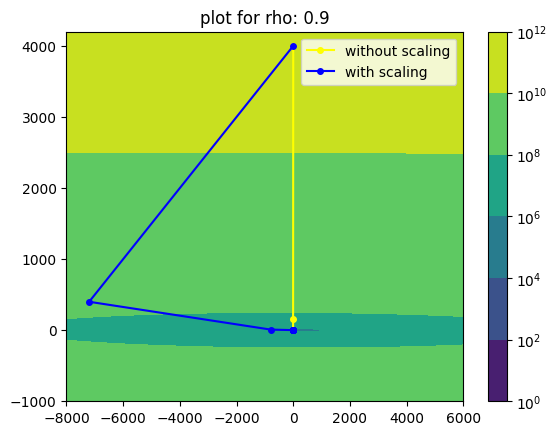

---------------------------------------------------------------------------
rho =  0.8
iterations  =  1331
final minimizer =  [-4.79006925e-13  5.77859847e-16]
final value =  2.2887471356620955e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.8
iterations  =  16
final minimizer =  [-9.76561279e-16  4.88265991e-18]
final value =  9.727436542890936e-31
type =  with scaling
---------------------------------------------------------------------------


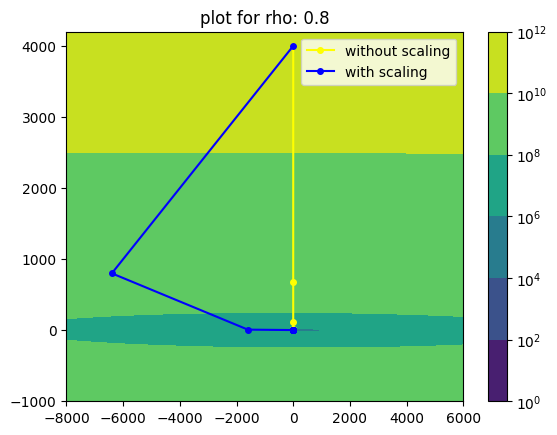

---------------------------------------------------------------------------
rho =  0.75
iterations  =  538
final minimizer =  [-4.12345553e-13  4.98693146e-16]
final value =  1.6960423093180596e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.75
iterations  =  16
final minimizer =  [-1.22070198e-15  4.57744598e-18]
final value =  1.5012873546806794e-30
type =  with scaling
---------------------------------------------------------------------------


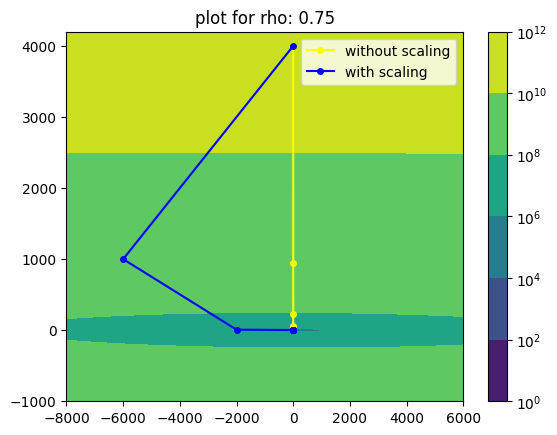

---------------------------------------------------------------------------
rho =  0.6
iterations  =  5615
final minimizer =  [-4.86809153e-13  6.52330287e-16]
final value =  2.363937657228955e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.6
iterations  =  16
final minimizer =  [-1.95312408e-15  3.66180420e-18]
final value =  3.8075399534401486e-30
type =  with scaling
---------------------------------------------------------------------------


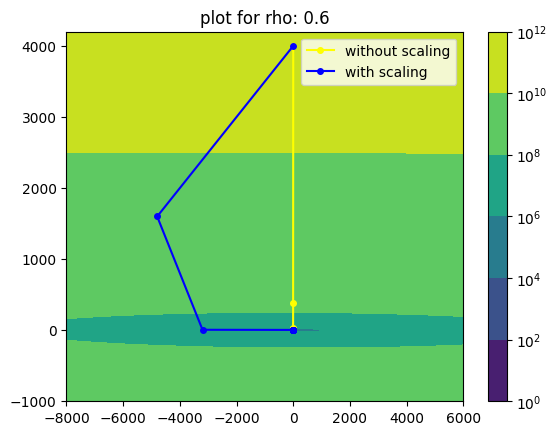

---------------------------------------------------------------------------
rho =  0.5
iterations  =  16981
final minimizer =  [-4.77038750e-13  6.86254384e-16]
final value =  2.2701000104598094e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.5
iterations  =  17
final minimizer =  [-1.22375412e-15  3.05156660e-18]
final value =  1.4975359710576571e-30
type =  with scaling
---------------------------------------------------------------------------


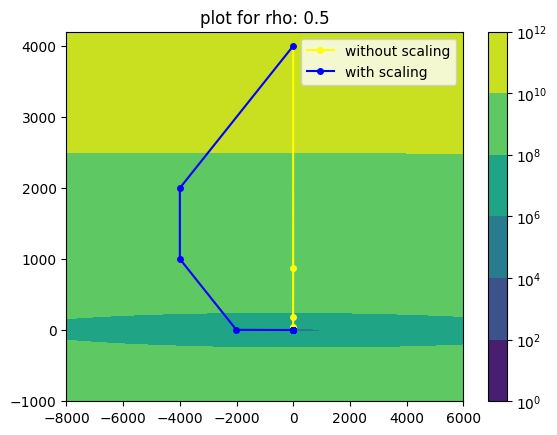

---------------------------------------------------------------------------
rho =  0.4
iterations  =  5961
final minimizer =  [-4.92016016e-13  6.63916164e-16]
final value =  2.414783857100508e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.4
iterations  =  17
final minimizer =  [-1.75976489e-15  2.92941254e-18]
final value =  3.0898825002947456e-30
type =  with scaling
---------------------------------------------------------------------------


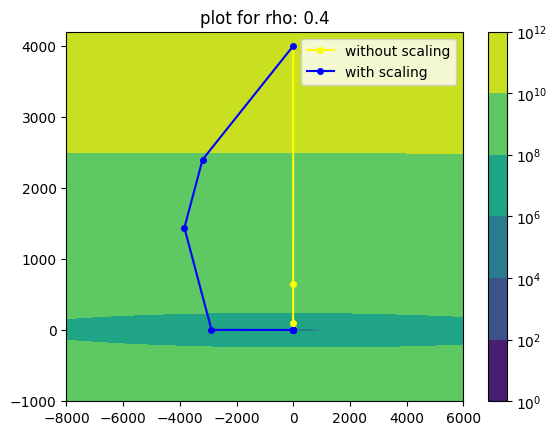

---------------------------------------------------------------------------
rho =  0.25
iterations  =  15287
final minimizer =  [-4.78952422e-13  5.09080727e-16]
final value =  2.2883478137396547e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.25
iterations  =  19
final minimizer =  [-1.54752679e-15  2.57539411e-18]
final value =  2.3895094434340225e-30
type =  with scaling
---------------------------------------------------------------------------


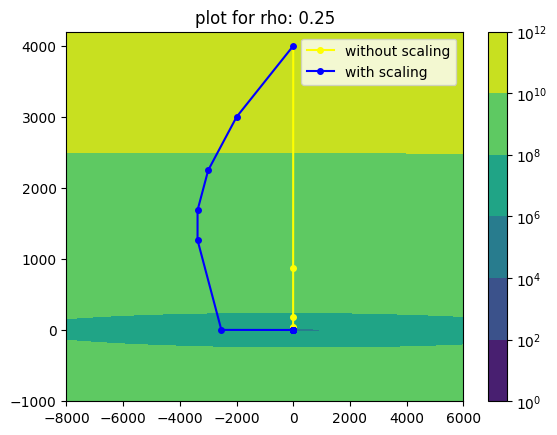

---------------------------------------------------------------------------
rho =  0.1
iterations  =  37849
final minimizer =  [-4.44250589e-13  6.83670379e-16]
final value =  1.96891550544363e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.1
iterations  =  25
final minimizer =  [-1.70489582e-15  2.36523646e-18]
final value =  2.8994907865533534e-30
type =  with scaling
---------------------------------------------------------------------------


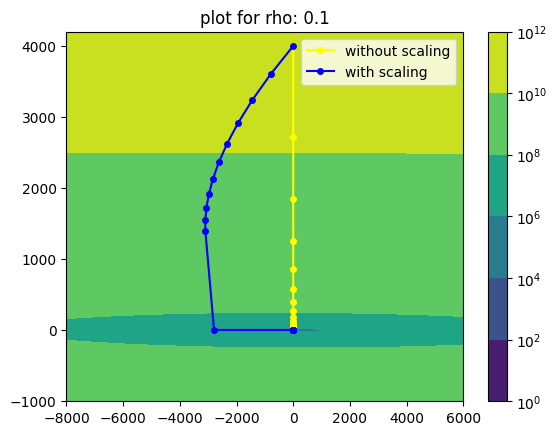

---------------------------------------------------------------------------
rho =  0.01
iterations  =  13538
final minimizer =  [-4.87654555e-13  5.39105672e-16]
final value =  2.3722039118811697e-25
type =  without scaling
---------------------------------------------------------------------------
rho =  0.01
iterations  =  115
final minimizer =  [-1.78952383e-15  2.25730189e-18]
final value =  3.194390227877738e-30
type =  with scaling
---------------------------------------------------------------------------


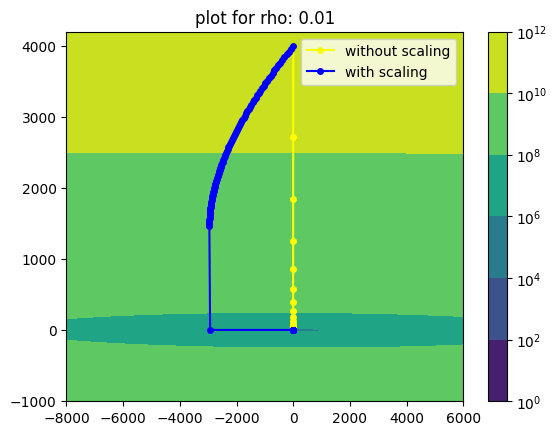

In [ ]:
#initializations
x0 = np.array([1,4000])
tau = 1e-12
alpha0 = 1
gamma = 0.5
rhos = [0.9, 0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]


## empty array to store
iterations_backtracking_without_scaling = []
iterations_backtracking_with_scaling = []
minimizer_backtracking_without_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []
minimum_backtracking_without_scaling = []


for rho in rhos:
  Dk = d()
  count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0, Dk)
  print("---------------------------------------------------------------------------")
  print("rho = " ,rho)
  print("iterations  = ",count1)
  print("final minimizer = ", final_xk1)
  print("final value = ", final_val1)
  print("type = ", 'without scaling')
  print("---------------------------------------------------------------------------")
  print("rho = " ,rho)
  print("iterations  = ",count2)
  print("final minimizer = ", final_xk2)
  print("final value = ", final_val2)
  print("type = ", 'with scaling')
  print("---------------------------------------------------------------------------")
  # Plot
  x = np.linspace(-8000, 6000, 4000)
  y = np.linspace(-1000, 4200, 4000)
  X, Y = np.meshgrid(x, y)
  Z = f((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())
  plt.title(f"plot for rho: {rho}")
  cbar = plt.colorbar(p)
  xcordinates1 = [xk1[0] for xk1 in xks1]
  ycordinates1 = [xk1[1] for xk1 in xks1]
  plt.plot(xcordinates1, ycordinates1, color='yellow', marker = 'o', markersize = 4, label = 'without scaling')
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='blue',  marker = 'o', markersize = 4, label = 'with scaling')
  plt.legend()
  plt.show()
  iterations_backtracking_without_scaling.append(count1)
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_without_scaling.append(final_xk1)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_without_scaling.append(final_val1)
  minimum_backtracking_with_scaling.append(final_val2)

#OBSERVATION
Scaling significantly reduces the number of iterations by almost making the ill-conditioned Hessian an identity matrix. Lowering \( \rho \) decreases iterations. The scaled backtracking method takes a roundabout path to the minimizer, requiring fewer iterations. Without scaling, there's an initial large jump towards the minimizer, followed by slower convergence. Scaling helps "unstretch" the function along the x-axis.

**4. Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling,
can you identify and write down the matrix Q whose condition number needs to be analyzed in the new gradient
descent scheme with scaling with $D_k = (∇2f(x))−1$ ?, For the problem minx $g(x) = 512(x_2 − x_1^2)^2 + (4 − x_1)^2$
,
Implement Algorithm - 1 with starting point $x_0 = (8, 8)$ and a stopping tolerance $τ = 10^{−5}$
, find the
number of iterations taken by the gradient descent algorithm (without scaling) with backtracking line search,
gradient descent algorithm (with scaling) with backtracking line search. For backtracking line search, use $ α_0 =
1, ρ = 0.5, γ = 0.5$. Note the minimizer and minimum objective function value in each case. Comment on
your observations. Also note the condition number of the Hessian matrix involved in the gradient descent
algorithm (without scaling) with backtracking line search and condition number of the matrix Q involved in
the gradient descent algorithm (with scaling) with backtracking line search in each iteration. Prepare a plot
depicting the behavior of condition numbers in both algorithms against iterations. Use different colors and
legend to distinguish the methods. Comment on your observations.**


In [ ]:
def gx1(xk):
  return  (512*(xk[1]-xk[0]**2)**2) + (4-xk[0])**2

def gradient_gx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array( [-2048*(x2-x1**2)*x1 - 8 + 2*x1, 1024*(x2-x1**2)] )

def hessian_gx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([[6144*x1**2-2048*x2+2,-2048*x1],[-2048*x1,1024]])

def dk_gx1(xk):
  return np.linalg.inv(hessian_gx1(xk))

def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_gx1(xk)
  while gx1(xk + alpha*pk) > (gx1(xk) + gamma*alpha*gradient_gx1(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_baktracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_gx1(xk)
  xks = []
  xks.append(xk)
  cond_hs = []

  while norm(pk)>tau:

    ## storing condition number
    hessian = hessian_gx1(xk)
    cond_hs.append(condition_number(hessian))

    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_gx1(xk)
    count += 1
    xks.append(xk)
  return count, xk, gx1(xk),xks, cond_hs

def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_gx1(xk)
  while gx1(xk + alpha*Dk@pk) > (gx1(xk) + gamma*alpha*gradient_gx1(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_gx1(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  Dk = dk_gx1(xk)
  cond_q = []
  cond_hs = []

  while norm(pk)>tau:

    ## storing condition number
    hessian = hessian_gx1(xk)
    cond_hs.append(condition_number(hessian))
    Dk = dk_gx1(xk)
    Q = fractional_matrix_power(Dk, 0.5)@hessian@fractional_matrix_power(Dk, 0.5)
    condition_no = condition_number(Q)
    cond_q.append(condition_no)

    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*Dk@pk
    pk = -1*gradient_gx1(xk)
    Dk = dk_gx1(xk)
    xks.append(xk)
    count += 1
  return count, xk, gx1(xk), xks, cond_hs, cond_q

def condition_number(A):
  return np.linalg.cond(A, p=None)

<ipython-input-8-774ad37d6d5d>:2: RuntimeWarning: overflow encountered in long_scalars
  return  (512*(xk[1]-xk[0]**2)**2) + (4-xk[0])**2


---------------------------------------------------------------------------
rho =  0.5
iterations  =  902403
final minimizer =  [ 3.99995978 15.99967825]
final value =  1.6175204028483831e-09
type =  without scaling
---------------------------------------------------------------------------
rho =  0.5
iterations  =  48
final minimizer =  [ 4. 16.]
final value =  2.356430075812841e-25
type =  with scaling
---------------------------------------------------------------------------


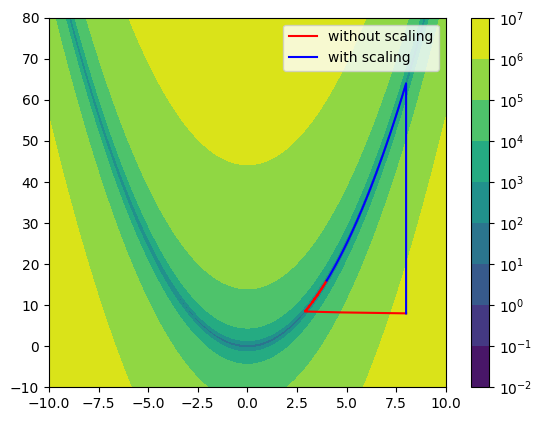

In [ ]:
# INITIALIZATIONS
x0 = np.array([8,8])
tau = 1e-5
alpha0 = 1
gamma = 0.5
rhos = [0.5]

iterations_backtracking_without_scaling = []
iterations_backtracking_with_scaling = []
minimizer_backtracking_without_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []
minimum_backtracking_without_scaling = []

#print("rho       ,iterations        ,final minimizer    , final value   |type    ")
#print("---------------------------------------------------------------------------")
for rho in rhos:
  Dk = dk_gx1(x0)
  count1, final_xk1, final_val1, xks1, cond_hs = gradient_descent_with_baktracking(x0, tau, rho, gamma, alpha0)
  count2, final_xk2, final_val2, xks2, cond_hs_with_scale, cond_q_with_scale = gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0, Dk)
  #print(f"{rho}    ,{count1}   ,{final_xk1}    ,{final_val1}     | without scaling")
  #print(f"{rho}    ,{count2}   ,{final_xk2}    ,{final_val2}     | with scaling")
  print("---------------------------------------------------------------------------")
  print("rho = " ,rho)
  print("iterations  = ",count1)
  print("final minimizer = ", final_xk1)
  print("final value = ", final_val1)
  print("type = ", 'without scaling')
  print("---------------------------------------------------------------------------")
  print("rho = " ,rho)
  print("iterations  = ",count2)
  print("final minimizer = ", final_xk2)
  print("final value = ", final_val2)
  print("type = ", 'with scaling')
  print("---------------------------------------------------------------------------")


  # Plot

  x = np.linspace(-10, 10, 1000)
  y = np.linspace(-10, 80, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx1((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())
  cbar = plt.colorbar(p)
  xcordinates1 = [xk1[0] for xk1 in xks1]
  ycordinates1 = [xk1[1] for xk1 in xks1]
  plt.plot(xcordinates1, ycordinates1, color='red', label = 'without scaling')
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  plt.legend()
  plt.show()

  iterations_backtracking_without_scaling.append(count1)
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_without_scaling.append(final_xk1)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_without_scaling.append(final_val1)
  minimum_backtracking_with_scaling.append(final_val2)

#OBSERVATION
In both cases, the minimizer and minimum value are (4, 16) and 0, respectively. The scaled version took significantly longer, about 900,000 iterations, compared to only 48 iterations for the unscaled version. This highlights the crucial role of matrix conditioning. Despite its roundabout trajectory, the scaled version reached the minimum in just 48 steps.

Text(0.5, 1.0, 'Without Scale Algorithm')

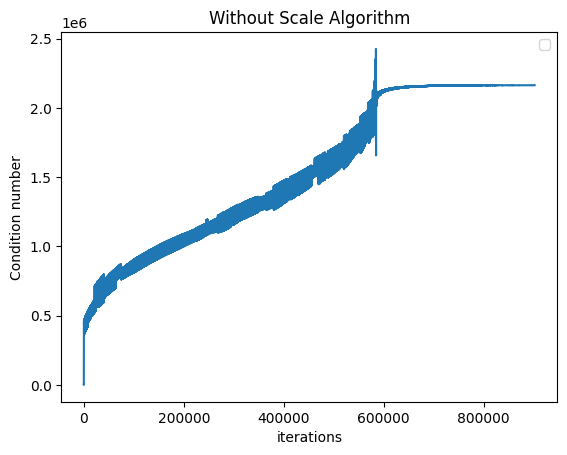

In [ ]:
plt.plot([i+1 for i in range(count1)], cond_hs)
plt.xlabel('iterations')
plt.ylabel("Condition number")
plt.legend()
plt.title("Without Scale Algorithm")

Text(0.5, 1.0, ' With Scale Algorithm')

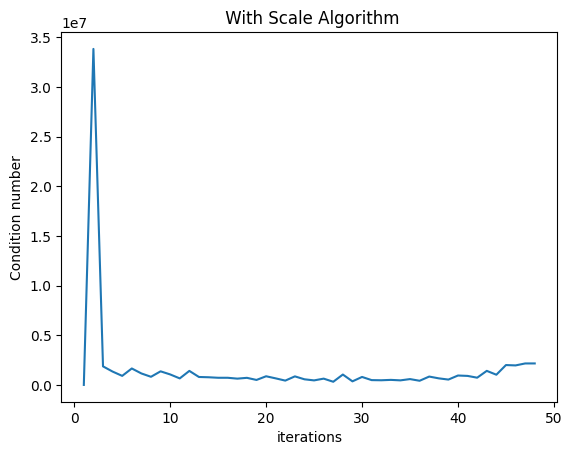

In [ ]:
plt.plot([i+1 for i in range(count2)], cond_hs_with_scale)
plt.xlabel('iterations')
plt.ylabel("Condition number")
plt.title(" With Scale Algorithm")

Text(0.5, 1.0, 'With Scale Algorithm')

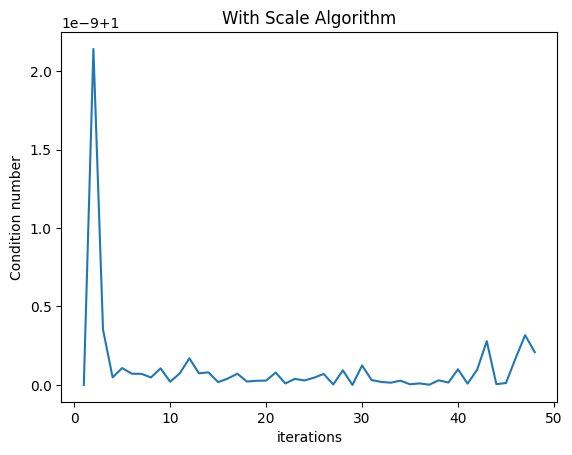

In [ ]:
plt.plot([i+1 for i in range(count2)], cond_q_with_scale)
plt.xlabel('iterations')
plt.ylabel("Condition number")
plt.title("With Scale Algorithm")